## SVM (ForestFire)

## classify the Size_Categorie using SVM

month month of the year: 'jan' to 'dec'

day day of the week: 'mon' to 'sun'

FFMC FFMC index from the FWI system: 18.7 to 96.20

DMC DMC index from the FWI system: 1.1 to 291.3

DC DC index from the FWI system: 7.9 to 860.6

ISI ISI index from the FWI system: 0.0 to 56.10

temp temperature in Celsius degrees: 2.2 to 33.30

RH relative humidity in %: 15.0 to 100

wind wind speed in km/h: 0.40 to 9.40

rain outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie the burned area of the forest ( Small , Large)

## 1. Import Libs

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac 
from sklearn.metrics import classification_report as report,roc_curve 
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
from google.colab import files
upload = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
forest_fire = pd.read_csv('forestfires.csv')
forest_fire


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [4]:
forest_fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest_fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
#Target variable
y_count = forest_fire.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


small    378
large    139
Name: size_category, dtype: int64

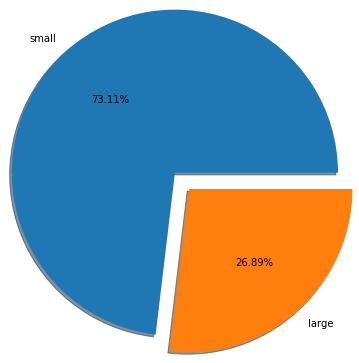

In [7]:
plt.figure(figsize=(10,5))
plt.pie(forest_fire['size_category'].value_counts(),labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5, )
forest_fire['size_category'].value_counts()


In [8]:
forest_fire.describe().T


,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


## Checking Outlires

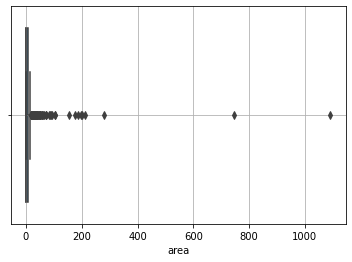

In [9]:
sns.boxplot(forest_fire['area'])
plt.grid()


## There are 3 Outlier instances in our data

Skewness = 12.846933533934868
Kurtosis = 194.1407210942299


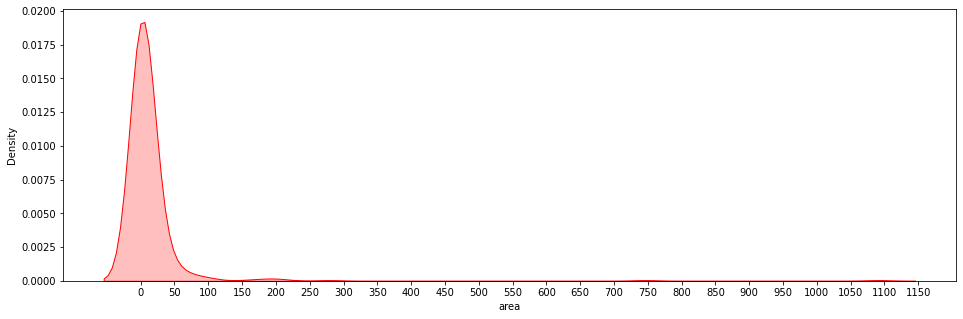

In [10]:
plt.figure(figsize=(16,5))
print("Skewness =",forest_fire['area'].skew())
print("Kurtosis =",forest_fire['area'].kurtosis())
sns.kdeplot(forest_fire['area'],shade=True,color='r')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

## The Data is highly skewed and has large kurtosis value
## Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [11]:
dfa = forest_fire[forest_fire.columns[0:10]]
month_colum = dfa.select_dtypes(include='object')
month_colum


,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


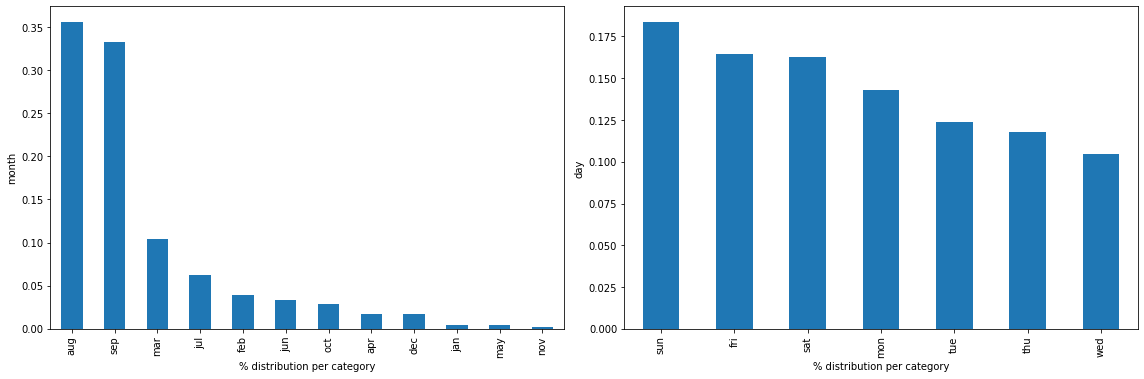

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    forest_fire[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [13]:
scL =forest_fire['size_category'] == 'large'

Text(0.5, 1.0, 'Different Time periode of fire')

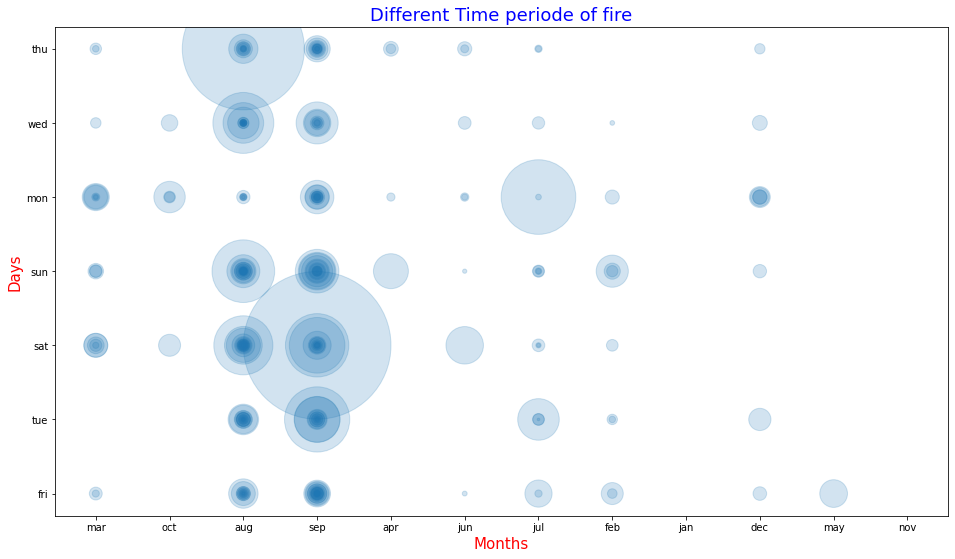

In [14]:
forest_fire.plot(kind='scatter', x='month', y='day', alpha=0.2, s=20*forest_fire['area'],figsize=(16,9))
plt.xlabel('Months',color='red',fontsize=15)
plt.ylabel('Days',color='red',fontsize=15)
plt.title('Different Time periode of fire',color='blue',fontsize=18)

## Majority of the fire accors in the month Aug and Sep || sunday and friday have recorded the most cases of fire

In [15]:
num_columns = dfa.select_dtypes(exclude='object')

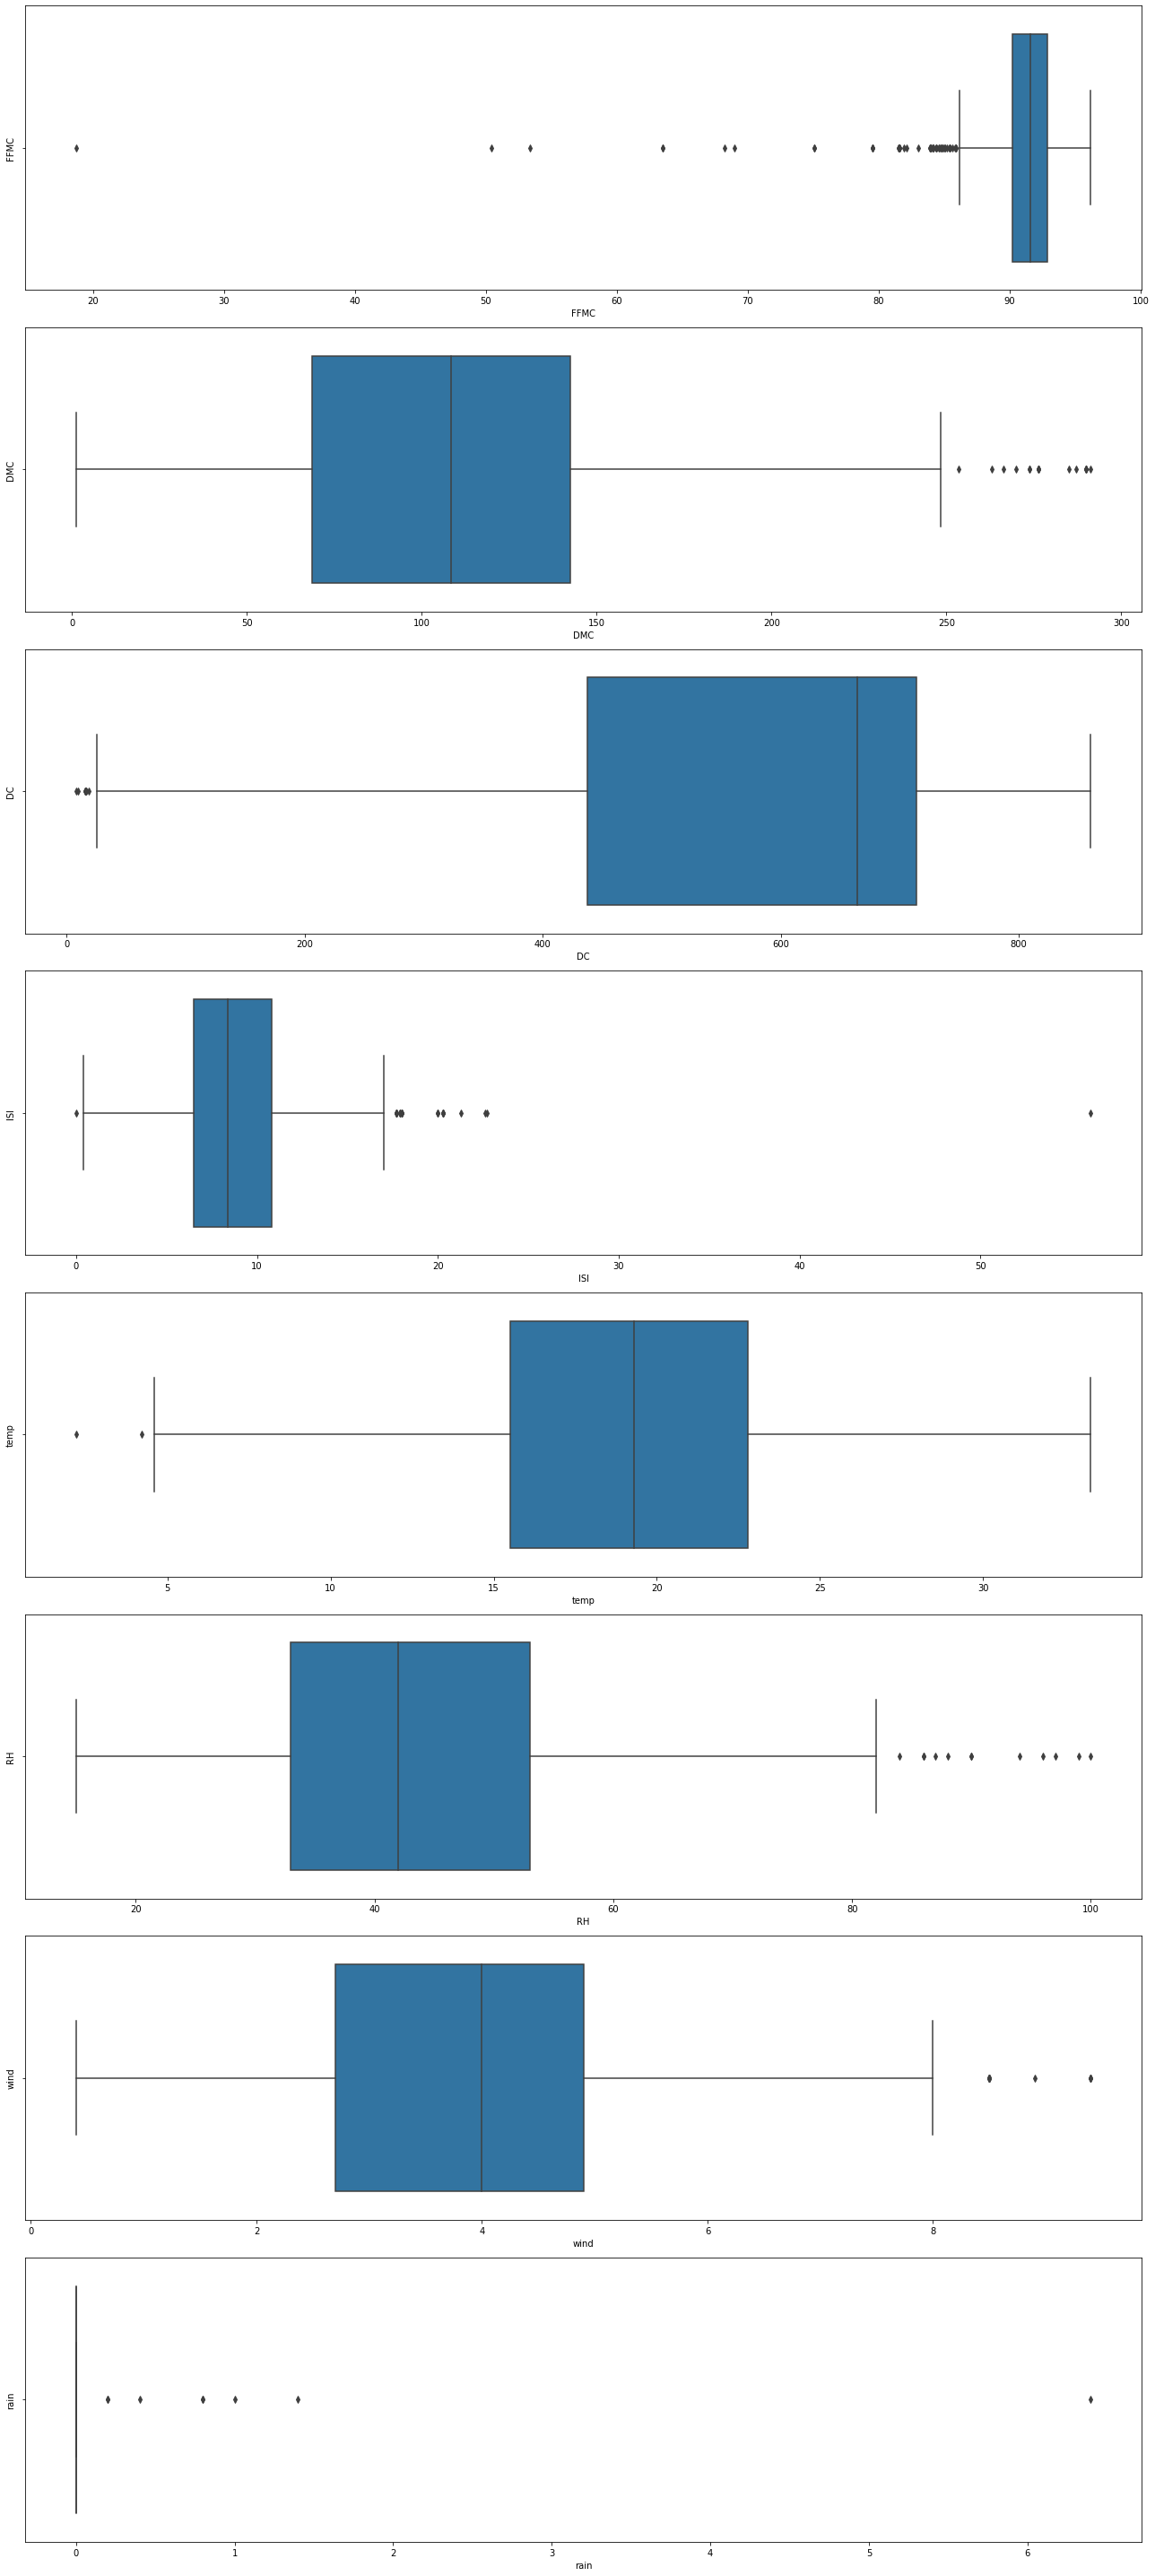

In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,1,i)
    sns.boxplot(forest_fire[col])
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    


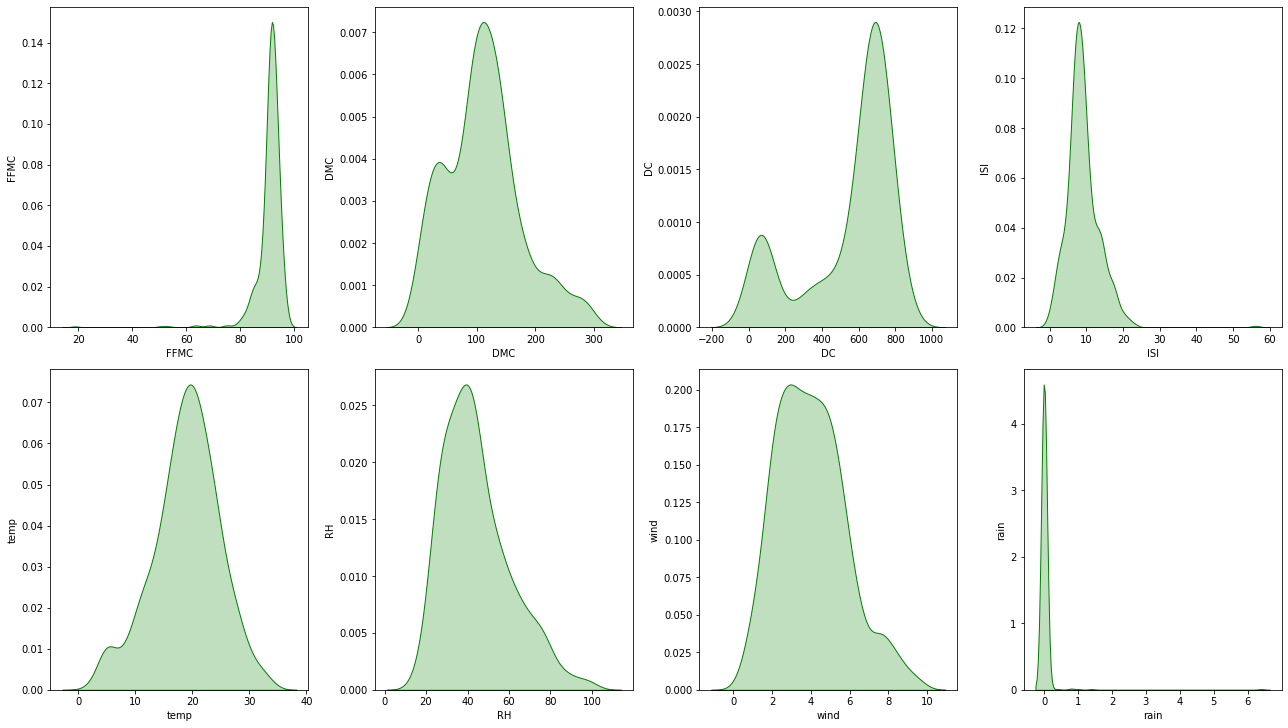

In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest_fire[col],color='g',shade=True,legend=True)
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    


In [18]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


## Finding Correlation

In [19]:
corr = forest_fire[forest_fire.columns[0:11]].corr()

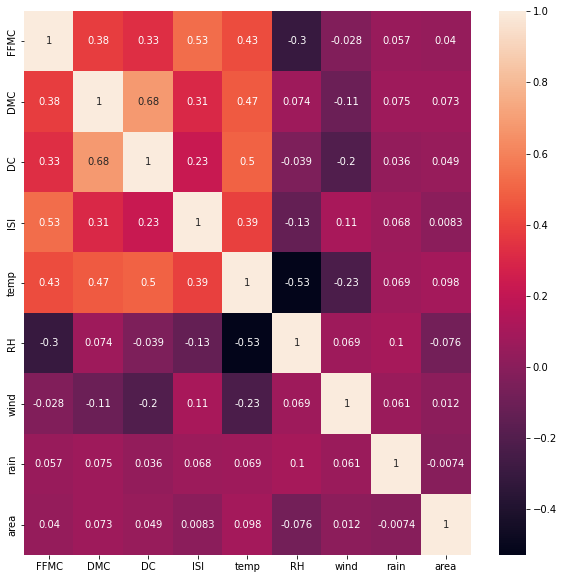

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## 4. Model Building
## SVM

In [21]:
X = forest_fire.iloc[:,2:30]
y = forest_fire.iloc[:,30]

In [22]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [25]:
mapping = {'small': 0, 'large': 1}

In [26]:
y = y.replace(mapping)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

## 4.1 Linear

In [28]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9903846153846154


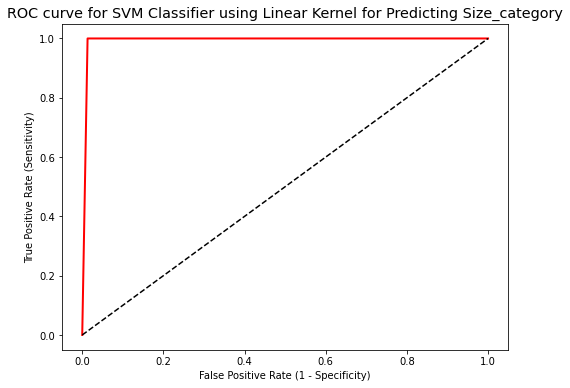

ROC AUC : 0.9934


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_linear)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_linear)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


## 4.2 Poly

In [30]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))


Accuracy: 0.7788461538461539


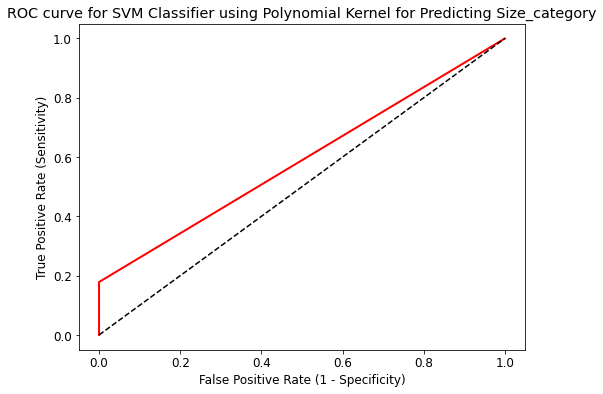

ROC AUC : 0.5893


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_poly)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_poly)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 4.3 RBF

In [32]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))


Accuracy: 0.7596153846153846


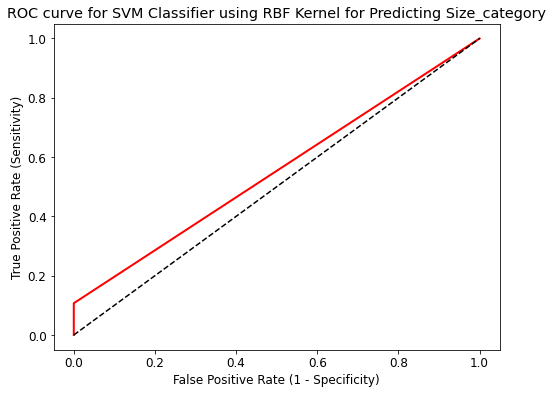

ROC AUC : 0.5536


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_rbf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_rbf)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


## 4.4 Sigmoid

In [34]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))


Accuracy: 0.7596153846153846


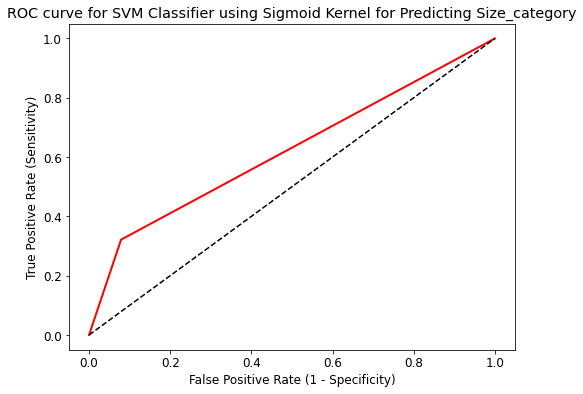

ROC AUC : 0.6212


In [35]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_sigmoid)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Sigmoid Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_sigmoid)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## The Linear Model has best accuracy compare to other Models
## END